# Beautiful Scientific Plots Cheatsheet + Latex Integration

Using some sample engineering data to create different forms of diagrams that can be utilized in scientific papers.

>Data presented are NOT intended to have scientific sense or interpretation.


In [1]:
#Imports#################################################################

from __future__ import division

import os
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import pandas as pd
import seaborn as sns
import codecs
from cycler import cycler

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if sys.path[0] == '':


In [2]:
#Use user specific style
plt.style.use('ggplot')


#Show Different Available Styles 
#print(plt.style.available)

In [3]:
#Read Data################################################################

#Dataframe from txt (tab delimited file)
df = pd.read_csv('./Test.txt', sep='\t', engine='python')

#Dataframe from excel
#df=pd.read_excel('C:\Users\T.Vitalis\Desktop\Test.xlsx')

In [4]:
#Data Info################################################################

#Dataframe Head
print(df.head(20))

#Dataframe descriptive statistics
#print(df.describe())

#Compute pairwise correlation of columns
#print(df.corr())

    Time  Load  Elong  Displacement  Stress  Strain  Width
0   0.00  0.00 -0.001           0.0     0.0  -0.002    0.0
1   0.00  0.00 -0.001           0.0     0.0  -0.002    0.0
2   0.02  0.00 -0.001           0.0     0.0  -0.002    0.0
3   0.04  0.00 -0.001           0.0     0.0  -0.002    0.0
4   0.06  0.00 -0.001           0.0     0.0  -0.002    0.0
5   0.08  0.00 -0.001           0.0     0.0  -0.002    0.0
6   0.10  0.00 -0.001           0.0     0.0  -0.002    0.0
7   0.12  0.00 -0.001           0.0     0.0  -0.002    0.0
8   0.14  0.00 -0.001           0.0     0.0  -0.002    0.0
9   0.16  0.00 -0.001           0.0     0.0  -0.002    0.0
10  0.18  0.00 -0.001           0.0     0.0  -0.002    0.0
11  0.20  0.00 -0.002           0.0     0.0  -0.004    0.0
12  0.22  0.00 -0.002           0.0     0.0  -0.004    0.0
13  0.24  0.00 -0.002           0.0     0.0  -0.004    0.0
14  0.26  0.00 -0.001           0.0     0.0  -0.002    0.0
15  0.28 -0.01 -0.001           0.0    -0.1  -0.002    0

In [5]:
#Data Editing##############################################################

#Dataframe Rename Column
#df.rename(columns={'Load':'Load in KN'}, inplace=True)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

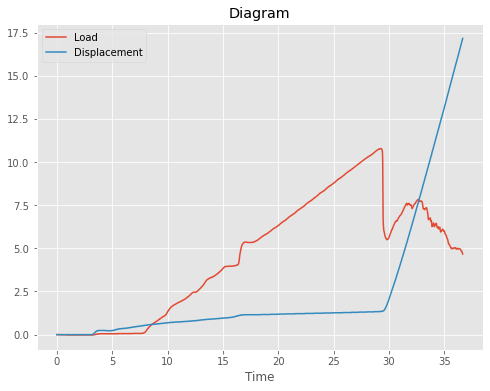

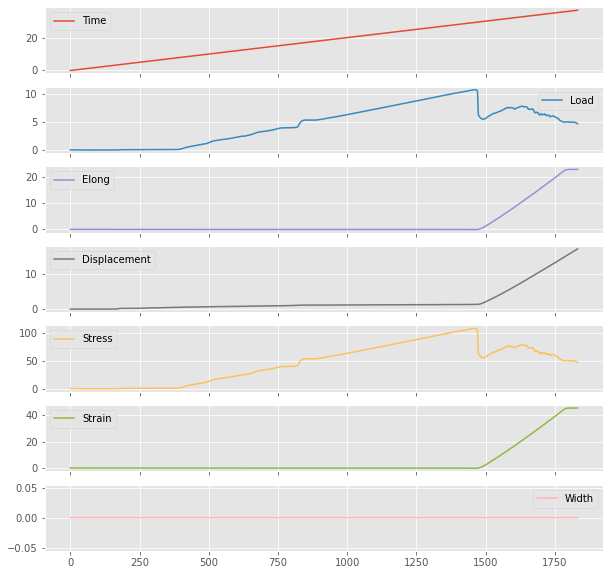

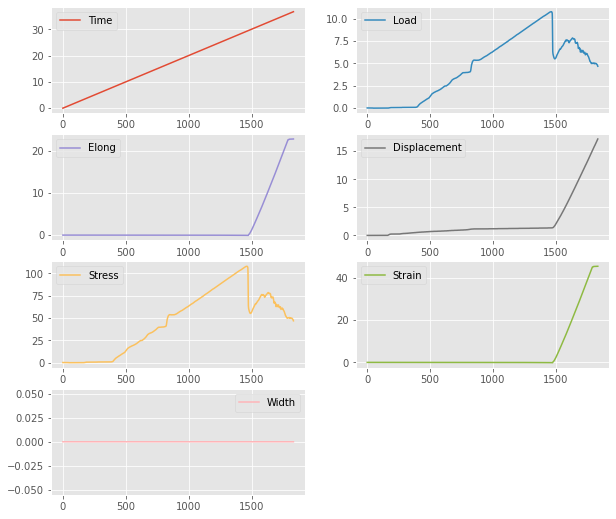

In [6]:
#Data Plotting with Pandas#################################################

#Line Plot of Time - Displacement

df.plot(kind='line', figsize=(8,6), title="Diagram", x='Time', y=['Load', 'Displacement'],style="")



#Subplots Vertical

df.plot(subplots=True, figsize=(10,10))


#Subplots Square

df.plot(subplots=True, layout=(7, 2), figsize=(10, 16), sharex=False)

Text(0.5, 1.0, 'Curve')

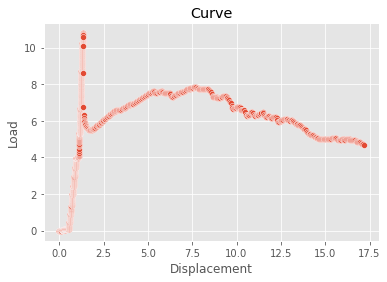

In [7]:
#Data Plotting with Seaborn################################################

#Scatter Plot

sns.scatterplot(x="Displacement", y="Load", data=df)
ax = plt.gca()
ax.set_title("Curve")


#Geometric grouping 

#sns.scatterplot(data=df, x="Time", y="Displacement", hue="time", style="time")

In [8]:
#Data Plotting with Matplotlib############################################

#Convert individual columns to lists
#col_x_list = df['Time'].tolist()
#col_y_list = df['Displacement'].tolist()

#print(f"type:{type(col_x_list)}")
#print(f"type:{type(col_y_list)}")


#OR Convert individual columns to numpy arrays (better)
col_x_arr = df['Time'].to_numpy()
col_y_arr = df['Displacement'].to_numpy()
col_y2_arr = df['Load'].to_numpy()

print(f"\ncol_x_arr:\n{col_x_arr}\ntype:{type(col_x_arr)}")
print(f"\ncol_y_arr:\n{col_y_arr}\ntype:{type(col_y_arr)}")


col_x_arr:
[0.0000e+00 0.0000e+00 2.0000e-02 ... 3.6604e+01 3.6624e+01 3.6644e+01]
type:<class 'numpy.ndarray'>

col_y_arr:
[ 0.     0.     0.    ... 17.062 17.112 17.163]
type:<class 'numpy.ndarray'>


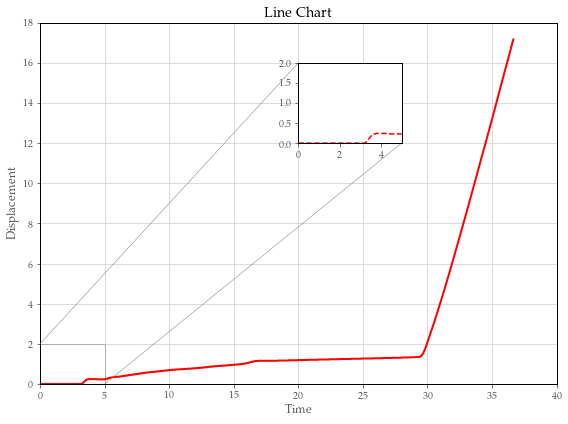

In [9]:
#Matplotlib Inset Axes (Subplots inside plots)

#Evenly sampled time at 200ms intervals
#t = np.arange(0., 40., 0.2)


#Style
#mpl.style.use('default')
#Use of Latex Fonts
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


#Subplot Axin1 - Inset Axes Addon
fig, ax = plt.subplots(figsize=(8,6))
axin1 = ax.inset_axes(
        [20, 12, 8, 4], transform=ax.transData)
axin1.plot(col_x_arr,col_y_arr, "r--")
#axin1.plot(col_x_arr,col_y2_arr,'b--')
axin1.set_xlim(0 , 5.0)
axin1.set_ylim(0, 2.0)
axin1.set(facecolor='white')
#axin1.grid(which='major', color='gray',linestyle='-') #Plot Gridlines in Subgrid
axin1.spines['bottom'].set_color('black')
axin1.spines['top'].set_color('black') 
axin1.spines['right'].set_color('black')
axin1.spines['left'].set_color('black')

#Marklines to trace inset
mark_inset(ax, axin1, loc1=2, loc2=4, fc="none", ec='0.5')


#Main Plot
line1=ax.plot(col_x_arr,col_y_arr)
#line2=ax.plot(col_x_arr,col_y2_arr)
ax.set_title('Matplotlib')
ax.set(facecolor='white')
ax.grid(which='major', color='lightgray',linestyle='-')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
#ax.legend(loc=0) #Legend if available
plt.setp(line1, color='r', linewidth=2.0)
#plt.setp(line2, color='b', linewidth=2.0)
plt.xlabel('Time')
plt.ylabel('Displacement')
#plt.yscale('log') #Logarithmic Scale
plt.axis([0, 40, 0, 18])
plt.grid(True)
plt.title('Line Chart')


#Show Plot
plt.tight_layout()
plt.show()